<div style="text-align: center;">

# MA 203: Numerical Methods
## Tutorial-4

Shardul Junagade <br>
23110297

</div>

## **Question 1:**

Derive the composite trapezoid rule from the basic trapezoid rule by dividing the interval $[a, b]$ into $n$ subintervals of equal width $h$. Clearly state the formula and the error term you obtain.

### **Solution:**

![Solution 1](./images/tutorial4/1.jpg)

---

## **Question 2:**

Write a function called `TrapzCompApprox` which takes input parameters as $f$, $a$, $b$ and $N$ and returns the trapezoidal composite approximation for the integral of $f$, where:
- $f$: Single variable function  
- $a$, $b$: Interval of integration $[a,b]$  
- $N$: Number of subintervals of $[a,b]$

Then test it on function $3x^2$ in $[0,1]$ for $N = 100$.

**Hint:** Use `np.linspace(a, b, N+1)` to make $N$ subintervals.


### **Solution:**

<!-- ![Solution 2](./images/tutorial3/4.jpg)

![Solution 2](./images/tutorial3/5.jpg) -->

In [ ]:
import numpy as np

def TrapzCompApprox(f, a, b, N):
    x = np.linspace(a, b, N+1)
    y = f(x)
    h = (b-a) / N
    
    integral = f(x[0])
    for i in range(1, N):
        integral += 2 * f(x[i])
    integral += f(x[N])
    integral *= h / 2

    f2_max = 6      # For f(x) = 3x^2, f''(x) = 6
    error_est = -((b - a) * (h**2) * f2_max)/12

    return integral, error_est

def f(x):
    return 3 * (x**2)

a = 0
b = 1
N = 100
integral, error_est = TrapzCompApprox(f, a, b, N)
approx_value = integral + error_est  # Adjusted approximation
exact_value = 1  # Exact value of the integral from 0 to 1 of f(x) = 3x^2

print(f"Composite Trapezoidal Approximation with N={N}:")
print(f"Approximate Integral: {integral:.6f}")
print(f"Error Estimate: {error_est:.6f}")
print(f"Adjusted Approximate Value: {approx_value:.6f}")
print(f"Exact Value: {exact_value:.6f}")
print(f"Absolute Error: {abs(approx_value - exact_value):.6f}")

Composite Trapezoidal Approximation with N=100: 1.0
Exact value: 1


---

## **Question 3:**

**Lotka-Volterra predator-prey model** is the following pair of ODEs:

$$\frac{dx}{dt} = ax - bxy$$

$$\frac{dy}{dt} = -cy + dxy$$

where:
- $x$ and $y$ denote the number of prey and predators respectively
- $a$ denotes the prey growth rate
- $c$ denotes the predator death rate
- $b$ and $d$ denote the rates characterizing the effect of the predator-prey interaction on prey death and predator growth, respectively.

Use the following parameter values and initial conditions:
$$a = 1.2, \quad b = 0.6, \quad c = 0.8, \quad d = 0.3, \quad x(0) = 2, \quad y(0) = 1.$$

Using:
a) Euler's method
b) Heun's method
with a step-size $h = 0.1$,


a. Find the solutions at $t = 0.1$ and $t = 0.2$ by performing manual calculations  
b. Simulate from $t = 0$ to $t = 20$ and plot the entire simulation

### **Solution:**


![Solution 3](./images/tutorial4/2.jpg)

![Solution 3](./images/tutorial4/3.jpg)

![Solution 3](./images/tutorial4/4.jpg)


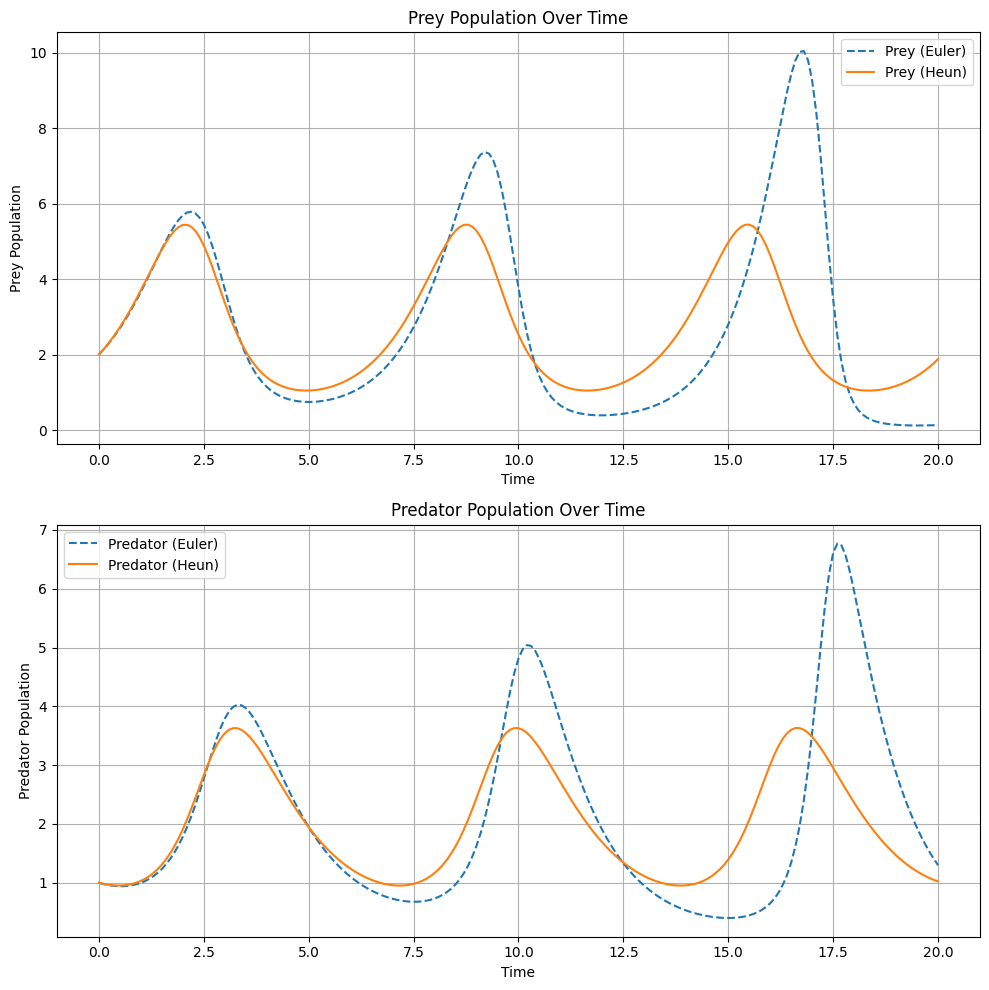

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the derivatives
def dx_dt(x, y):
    return a * x - b * x * y

def dy_dt(x, y):
    return -c * y + d * x * y

# Parameters
a = 1.2
b = 0.6
c = 0.8
d = 0.3

# Initial conditions
x0 = 2
y0 = 1

# Time parameters
h = 0.1
T = 20
t_values = np.arange(0, T + h, h)
N = len(t_values)



# Euler's Method
x_euler = np.zeros(N)
y_euler = np.zeros(N)
x_euler[0], y_euler[0] = x0, y0

for i in range(1, N):
    x = x_euler[i-1]
    y = y_euler[i-1]
    x_euler[i] = x + h*dx_dt(x, y)
    y_euler[i] = y + h*dy_dt(x, y)




# Heun's Method
x_heun = np.zeros(N)
y_heun = np.zeros(N)
x_heun[0], y_heun[0] = x0, y0

for i in range(1, N):
    x = x_heun[i-1]
    y = y_heun[i-1]

    # Predictor step (Euler)
    x_pred = x + h*dx_dt(x, y)
    y_pred = y + h*dy_dt(x, y)

    # Corrector step (Heun)
    x_heun[i] = x + (h/2)*(dx_dt(x, y) + dx_dt(x_pred, y_pred))
    y_heun[i] = y + (h/2)*(dy_dt(x, y) + dy_dt(x_pred, y_pred))





# Plotting Prey and Predator on separate subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# Prey population
axs[0].plot(t_values, x_euler, label='Prey (Euler)', linestyle='--')
axs[0].plot(t_values, x_heun, label='Prey (Heun)', linestyle='-')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Prey Population')
axs[0].set_title('Prey Population Over Time')
axs[0].legend()
axs[0].grid()

# Predator population
axs[1].plot(t_values, y_euler, label='Predator (Euler)', linestyle='--')
axs[1].plot(t_values, y_heun, label='Predator (Heun)', linestyle='-')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Predator Population')
axs[1].set_title('Predator Population Over Time')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()
